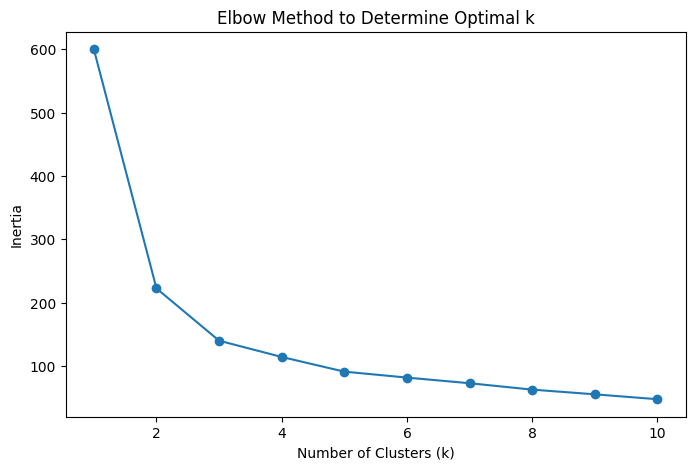

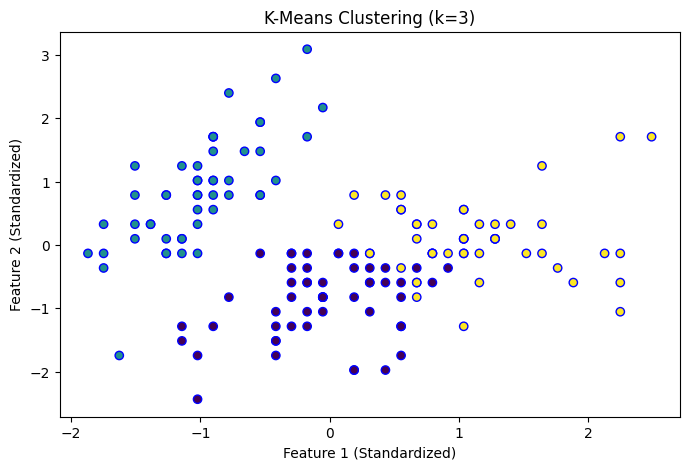

In [6]:
 # 9 assignment (K-mean clustring )
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.datasets import load_iris
 from sklearn.preprocessing import StandardScaler
 # Load the iris dataset
 iris = load_iris()
 X = iris.data
 # Standardize the data
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 # Determine the optimal number of clusters using the Elbow Method
 inertia = []
 k_range = range(1, 11)
 for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)  # This was missing indentation in your original code
  inertia.append(kmeans.inertia_)
 # Plot the Elbow Method result
 plt.figure(figsize=(8, 5))
 plt.plot(k_range, inertia, marker='o', linestyle='-')
 plt.xlabel('Number of Clusters (k)')
 plt.ylabel('Inertia')
 plt.title('Elbow Method to Determine Optimal k')
 plt.show()
 # Apply KMeans with the optimal number of clusters (based on the elbow method)
 optimal_k = 3  # From the Elbow Method, typically around 3 for Iris dataset
 kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
 kmeans.fit(X_scaled)
 labels = kmeans.labels_
 # Visualize the clusters (using the first two principal components for simplicity)
 plt.figure(figsize=(8, 5))
 plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='blue')
 plt.xlabel('Feature 1 (Standardized)')
 plt.ylabel('Feature 2 (Standardized)')
 plt.title(f'K-Means Clustering (k={optimal_k})')
 plt.show()

In [9]:
 # 8 assignment (KNN) TP,TN,FP,FN
 import pandas as pd
 import numpy as np
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
 # Load the iris dataset
 url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
 df = pd.read_csv(url, header=None, names=column_names)
 # Encode target variable (species) to numeric values
 label_encoder = LabelEncoder()
 df['species'] = label_encoder.fit_transform(df['species'])
 # Split the dataset into features and target variable
 X = df.drop('species', axis=1)  # Features
 y = df['species']  # Target variable
 # Split the dataset into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 # Initialize KNN classifier with k=3 (you can change k as needed)
 knn = KNeighborsClassifier(n_neighbors=3)
 # Fit the classifier on the training data
 knn.fit(X_train, y_train)
 # Predict on the test set
 y_pred = knn.predict(X_test)
 # Compute confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 # Extract TP, FP, TN, FN from confusion matrix
 TP = cm[0, 0]  # True Positive
 FP = cm[0, 1]  # False Positive
 TN = cm[1, 1]  # True Negative
 FN = cm[1, 0]  # False Negative
 # Compute other metrics
 accuracy = accuracy_score(y_test, y_pred)
 error_rate = 1 - accuracy
 precision = precision_score(y_test, y_pred, average='weighted')
 recall = recall_score(y_test, y_pred, average='weighted')
 f1 = f1_score(y_test, y_pred, average='weighted')
 # Print results
 print("Confusion Matrix:")
 print(cm)
 print("\nTrue Positives (TP):", TP)
 print("False Positives (FP):", FP)
 print("True Negatives (TN):", TN)
 print("False Negatives (FN):", FN)
 print("\nAccuracy:", accuracy)
 print("Error Rate:", error_rate)
 print("Precision:", precision)
 print("Recall:", recall)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

True Positives (TP): 19
False Positives (FP): 0
True Negatives (TN): 13
False Negatives (FN): 0

Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


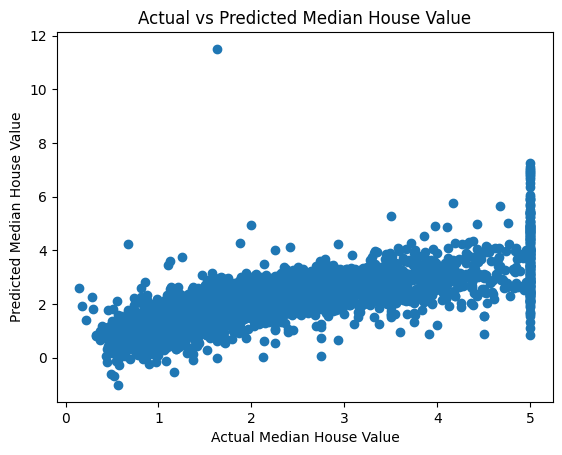

In [29]:
# 7 assignment linear regeression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data. feature_names)
y = pd. Series(data.target)
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model with Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Visualize the actual vs predicted values
plt. scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt. ylabel("Predicted Median House Value")
plt. title("Actual vs Predicted Median House Value")
plt. show()


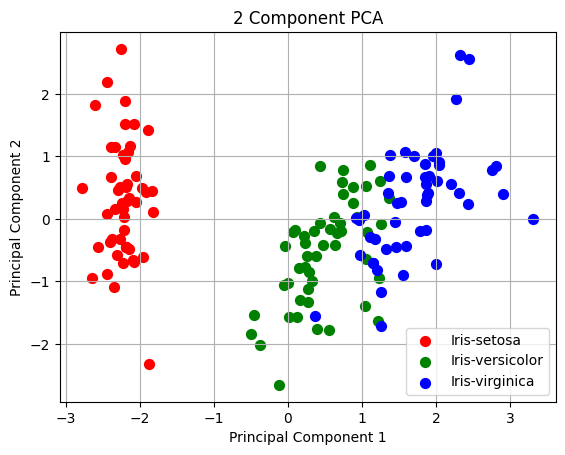

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Apply PCA
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:, ['class']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal_component_1', 'principal_component_2'])
finalDf = pd.concat([principalDf, df[['class']]], axis=1)

# Plotting the PCA result
plt.figure()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'],
                finalDf.loc[indicesToKeep, 'principal_component_2'],
                c=color,
                s=50)

plt.legend(targets)
plt.grid()
plt.show()
